In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from atypic.effects import (
    RollPixels,
    RollPixelsRandom,
    ColorValue,
    ColorChannelSplit,
    Corruption,
    Sort,
    ColorPaletteReduction,
)
from atypic.mask import Masker

effects = [
    RollPixels,
    RollPixelsRandom,
    ColorValue,
    ColorChannelSplit,
    Corruption,
    Sort,
    ColorPaletteReduction,
]


masks = [
    lambda mask_obj: mask_obj.create_whole_frame(),
    lambda mask_obj: mask_obj.create_circle(center=(0.5, 0.5), radius=0.2),
    lambda mask_obj: mask_obj.create_ellipse(
        center=(0.2, 0.2), axes=(0.1, 0.3), angle=45
    ),
    lambda mask_obj: mask_obj.create_polygon(
        points=[(0.1, 0.1), (0.3, 0.2), (0.9, 0.7), (0.3, 0.4)]
    ),
    lambda mask_obj: mask_obj.create_rectangle(
        top_left=(0.1, 0.1), bottom_right=(0.9, 0.9)
    ),
    lambda mask_obj: mask_obj.create_band(
        orientation="horizontal", start=0.1, end=0.9
    ),
    lambda mask_obj: mask_obj.create_stripes(
        orientation="vertical", stripe_width=0.1, gap=0.1
    ),
    lambda mask_obj: mask_obj.create_checkerboard(block_size=0.25),
]


(369, 492)
(369, 492)
(369, 492)
(369, 492)
(369, 492)
(369, 492)
(369, 492)
(369, 492)


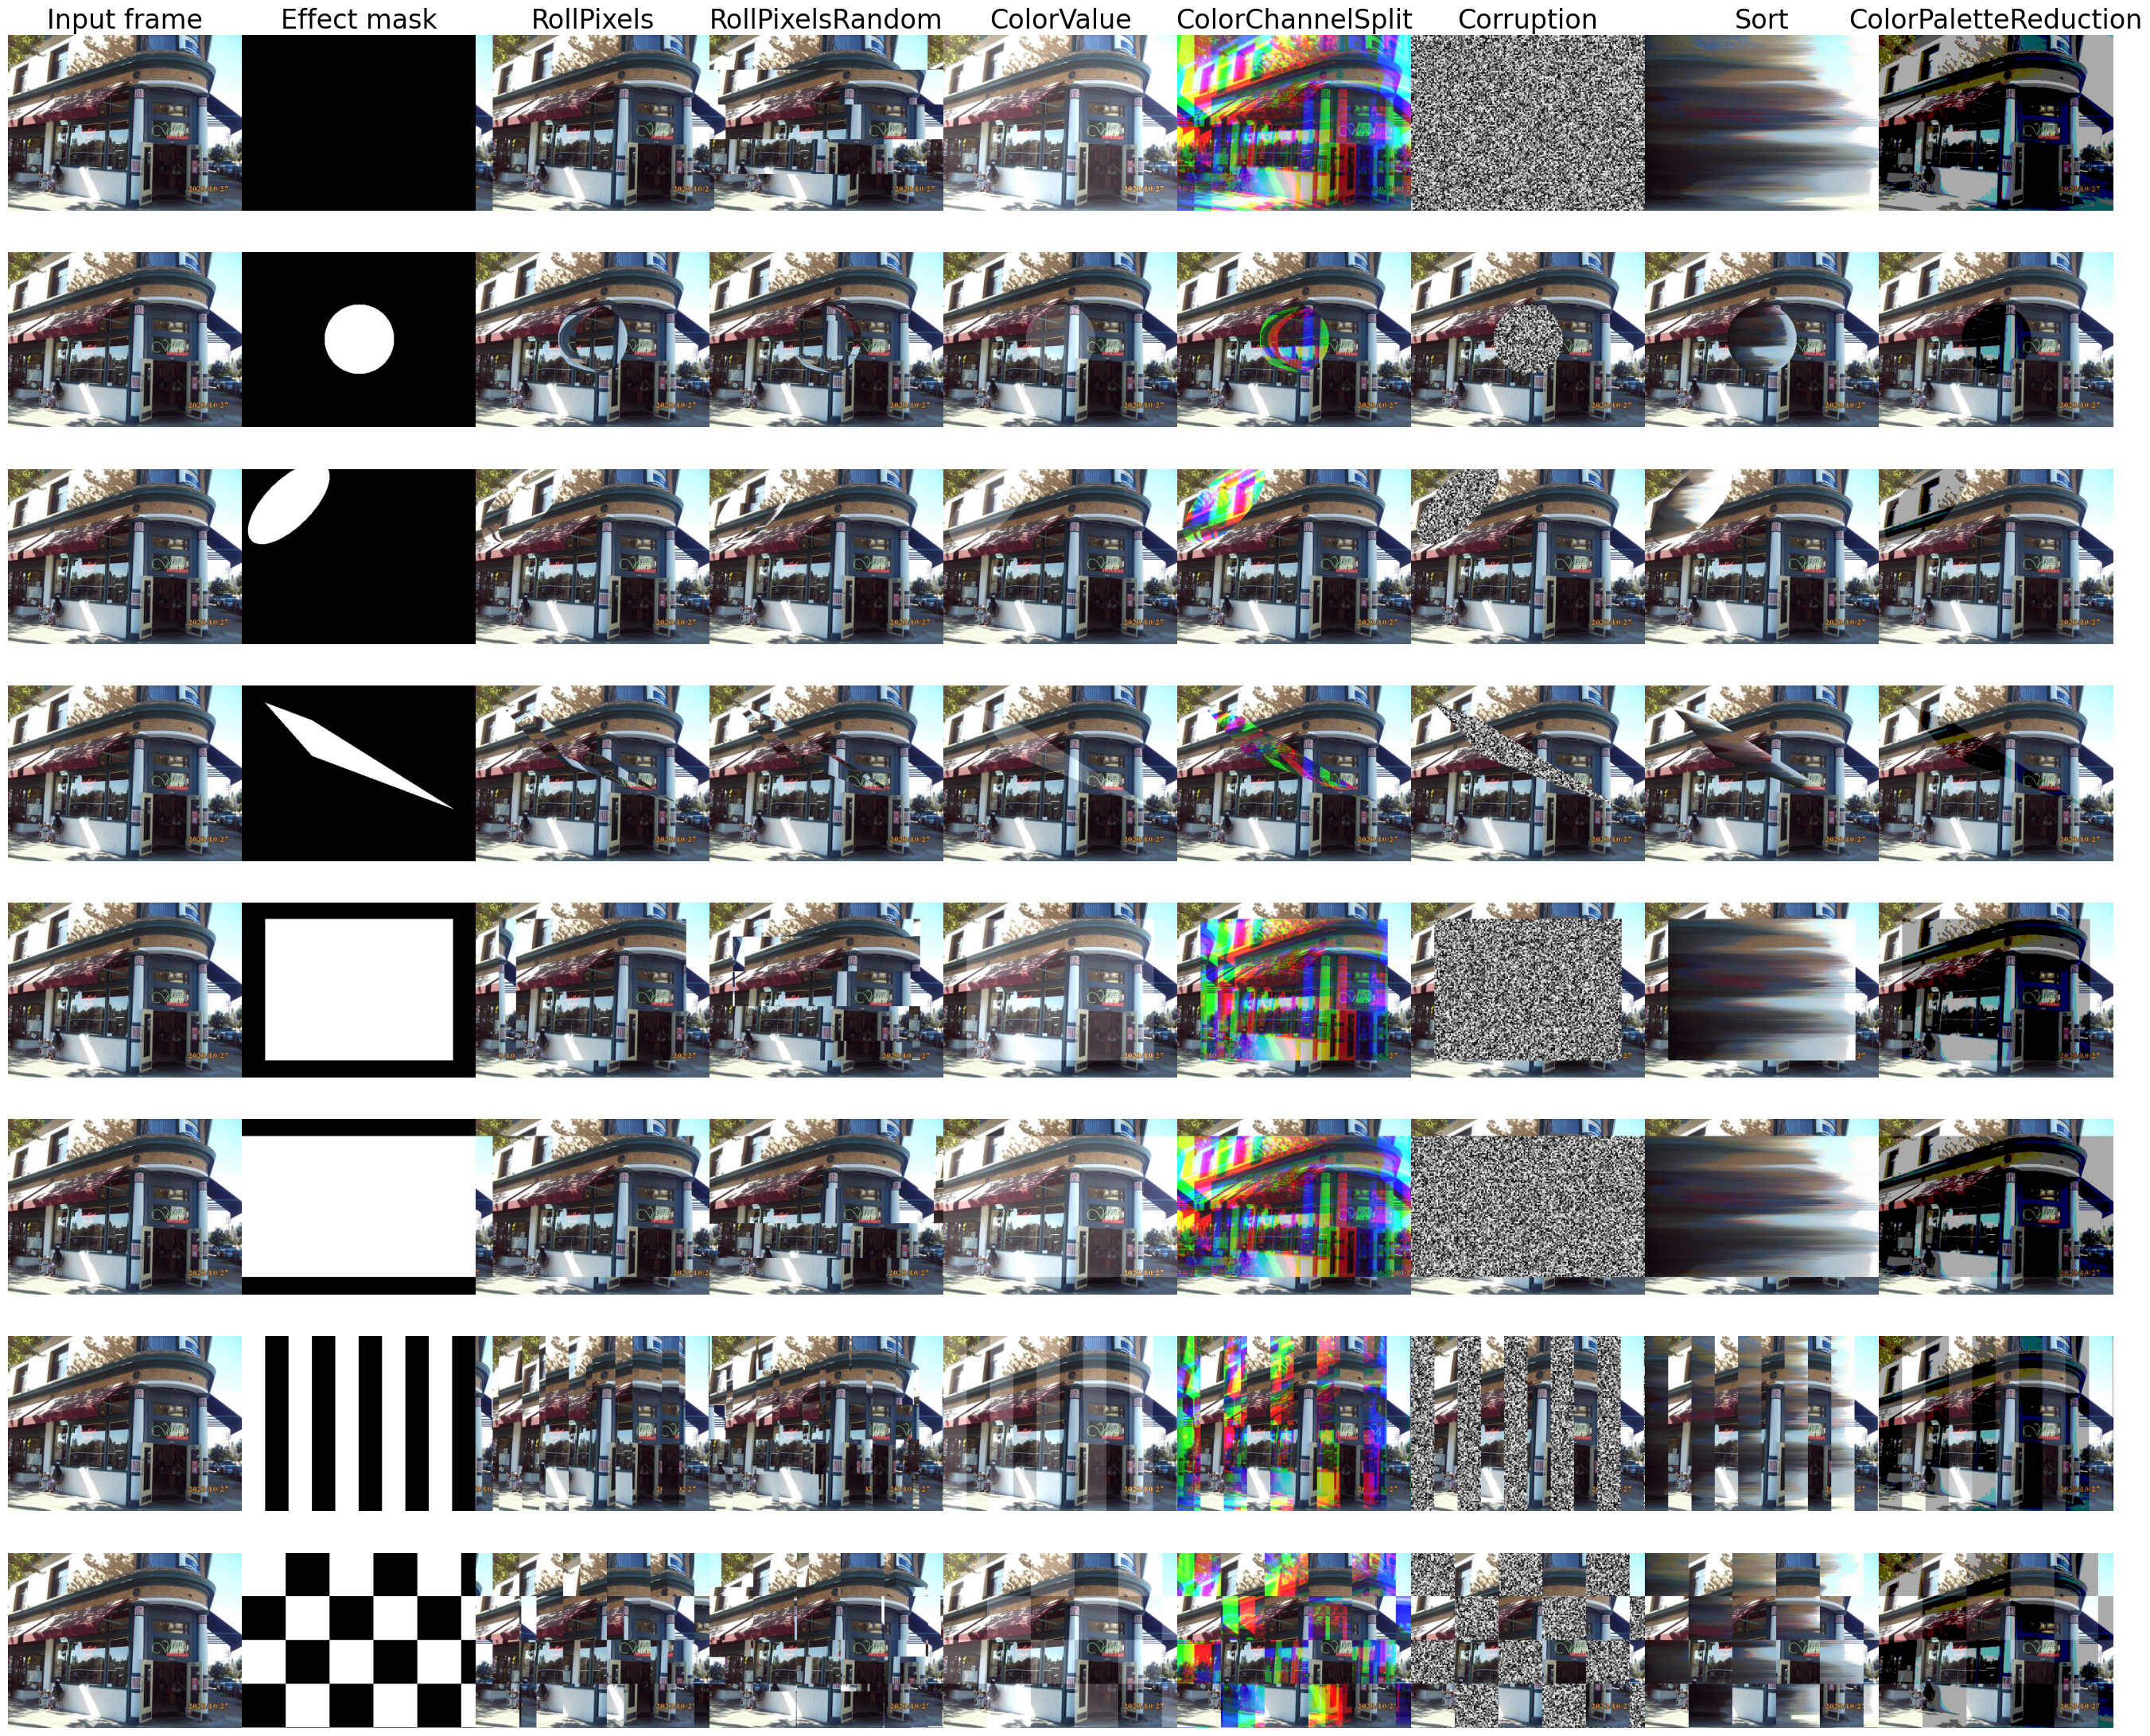

In [9]:


fig, ax = plt.subplots(len(masks), len(effects) + 2, figsize=(27, 22))
fig.subplots_adjust(
    left=0.01, right=0.99, top=0.99, bottom=0.01, hspace=0.1, wspace=0.0
)
for mask_num, (mask, ax) in enumerate(zip(masks, ax)):

    for axis in ax.flatten():
        axis.set_axis_off()
    frame = cv2.imread("images/test_image_1.jpg")
    masker = Masker(frame)
    mask(masker)
    ax[0].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    ax[0].set_title("Input frame", fontsize=24) if mask_num == 0 else ...
    ax[1].imshow(masker.mask, cmap="gray")
    ax[1].set_title("Effect mask", fontsize=24) if mask_num == 0 else ...
    for i, effect in enumerate(effects):
        effect_instance = effect(frame, mask=masker.mask)
        effect_out = effect_instance.apply()
        ax[i + 2].imshow(cv2.cvtColor(effect_out, cv2.COLOR_BGR2RGB))
        (
            ax[i + 2].set_title(effect.__name__.replace("Effect", ""), fontsize=24)
            if mask_num == 0
            else ...
        )
fig.set_alpha = 0

AxisError: axis 1 is out of bounds for array of dimension 0

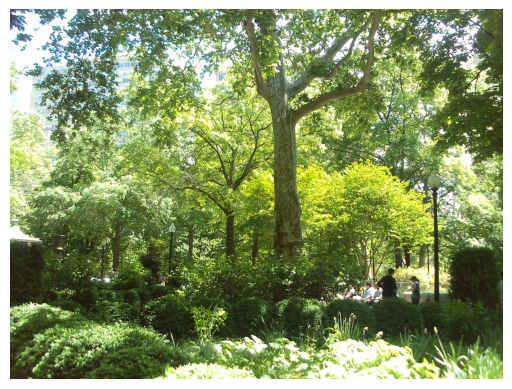

In [ ]:
import matplotlib.pyplot as plt
import cv2

frame = cv2.imread("images/test_image_2.jpg")
orig = plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis("off")
# plt.savefig(f"gif/test_output_mask_orig.jpg", bbox_inches="tight", pad_inches=0)
for ind, (mask, effect) in enumerate(zip(masks, effects[::-1])):
    masker = Masker(frame)
    mask(masker)
    effect_instance = effect(frame, mask=masker.mask)
    frame = effect_instance.apply()
    mask_image = plt.imshow(masker.mask, cmap="gray", alpha=0.5)
    plt.axis("off")
    # plt.savefig(f"gif/test_output_{ind}_0.jpg", bbox_inches="tight", pad_inches=0)
    mask_image.remove()
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    # plt.savefig(f"gif/test_output_{ind}_1.jpg", bbox_inches="tight", pad_inches=0)
    
    

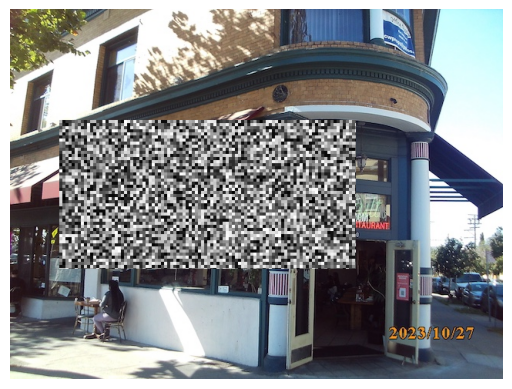

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from atypic import effects
from atypic import mask

frame = cv2.imread("test_input_1.jpg") #load image frame
masker = mask.Masker(frame) #create blank mask
masker.create_rectangle_mask((0.1,0.3),(0.7,0.7))
corruption_effect = effects.Corruption(frame, mask=masker.mask)
edited_frame = corruption_effect.apply()
plt.axis("off")  # Hide axes
plt.imshow(cv2.cvtColor(edited_frame, cv2.COLOR_BGR2RGB))
plt.savefig("basic_usage.jpg", bbox_inches="tight", pad_inches=0)

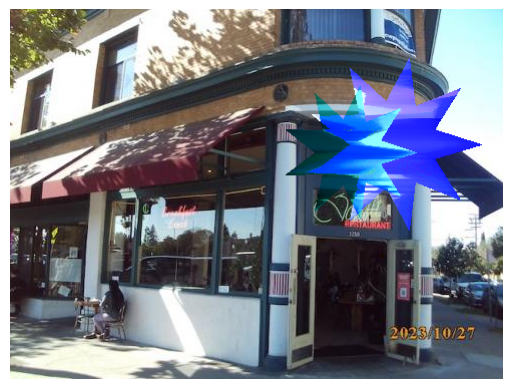

In [ ]:
import random
from atypic.effects import ColorValue, Sort
import cv2
import numpy as np
from atypic.mask import Masker
import matplotlib.pyplot as plt

# Load an image frame
frame = cv2.imread("images/test_image_1.jpg")

for _ in range(3):
    # Apply a random color value effect
    shift_value = np.random.randint(-255,255)
    channel = np.random.choice(['b', 'g', 'r', 'all'])
    num_star_points = np.random.randint(1,16)  # Random points for the star mask
    random_center = (np.random.rand(), np.random.rand())  # Random center for the star mask
    random_radius = np.random.rand() * 0.25  # Random radius for the star mask   
    # Create the effect instance
    mask = Masker(frame)
    mask.create_star_mask(random_center, random_radius,9)
    effect = ColorValue(frame, shift_value=shift_value, channel=channel, mask=mask.mask)
    frame = effect.apply()
    effect = Sort(frame, which=random.choice(['row', 'col']), reverse=random.choice([True, False]), mask=mask.mask)
    # Apply the effect
    frame = effect.apply()
    
    # Display the result
    # plt.axis("off")  # Hide axes
    # plt.imshow(cv2.cvtColor(edited_frame, cv2.COLOR_BGR2RGB))
    # plt.show()
# Display the result
# masker = Masker(frame)
# masker.create_star_mask([0.25,0.25],0.25, 10)
# effect = ColorValueEffect(frame, shift_value=-255, channel='r', mask=masker.mask)
# edited_frame = effect.apply()

# masker = Masker(frame)
# masker.create_circle_mask((0.5,0.5),0.25)
# effect = ColorValueEffect(frame, shift_value=255, channel='b', mask=masker.mask)
# edited_frame = effect.apply()
plt.axis("off")  # Hide axes
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
# plt.savefig("color_value_effect.jpg", bbox_inches="tight", pad_inches=0)


[1.]
[28 27 36]
[39 51 69]
[28 27 36]
[39. 51. 69.]


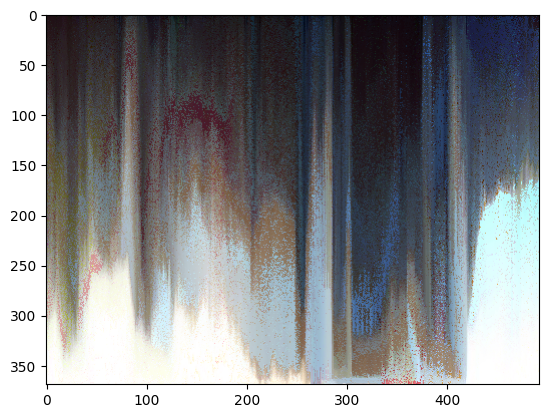

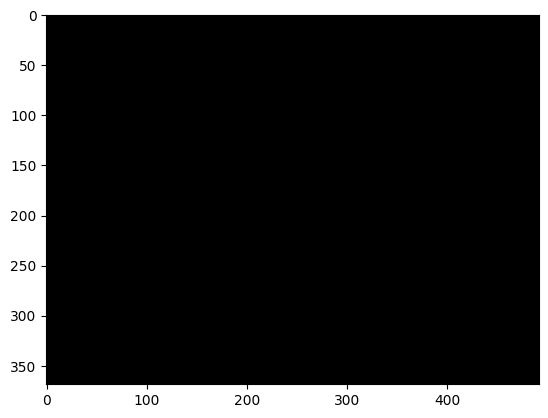

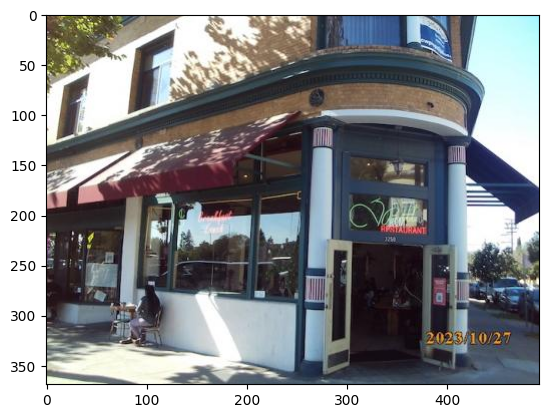

In [2]:
# plt.imshow(, vmin=0, vmax=255)  # Example usage of the create_star_mask method
from atypic.mask import Masker
import atypic.effects as a_eff
import numpy as np
import matplotlib.pyplot as plt
import cv2
# fig, ax = plt.subplots(1, 2, figsize=(10, 5))
frame = cv2.imread("images/test_image_1.jpg")
main = Masker(frame)
# main.create_rectangle((0.1, 0.1), (0.9, 0.9), opacity=100)
# for i in range(100):
#     # Create a random star mask
#     main.create_star(center=np.random.rand(2), radius=0.1, points=10, opacity=255)
# plt.imshow(main.mask, vmax=255)
corr_effect = a_eff.Sort(frame, which='col', sort_by='r')
new_frame = corr_effect.apply()
plt.figure()
plt.imshow(cv2.cvtColor(new_frame, cv2.COLOR_BGR2RGB))
plt.figure()
plt.imshow(main.mask, cmap='gray', vmin=0, vmax=255)
plt.figure()
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

